<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据预处理-&amp;-探索性分析" data-toc-modified-id="数据预处理-&amp;-探索性分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据预处理 &amp; 探索性分析</a></span></li><li><span><a href="#RFM得分" data-toc-modified-id="RFM得分-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RFM得分</a></span></li><li><span><a href="#K-Means建模" data-toc-modified-id="K-Means建模-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Means建模</a></span><ul class="toc-item"><li><span><a href="#确定最佳k值" data-toc-modified-id="确定最佳k值-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>确定最佳k值</a></span></li><li><span><a href="#可视化轮廓系数" data-toc-modified-id="可视化轮廓系数-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>可视化轮廓系数</a></span></li><li><span><a href="#三维空间可视化" data-toc-modified-id="三维空间可视化-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>三维空间可视化</a></span></li></ul></li><li><span><a href="#确定聚类" data-toc-modified-id="确定聚类-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>确定聚类</a></span></li><li><span><a href="#分析与总结" data-toc-modified-id="分析与总结-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>分析与总结</a></span></li></ul></div>

# Customer Segmentation

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
import os
import inspect

# plt.rcParams.update(plt.rcParamsDefault)
# mac系统解决中文乱码
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.style.available
style = 'tableau-colorblind10'   # 结合tableau，出于一致性使用tableau-colorblind10
sns.set_style('darkgrid')
# plt.style.available

## 数据预处理 & 探索性分析

In [2]:
rfm_ml=pd.read_csv('rfm_ml.csv')

In [3]:
rfm_ml=rfm_ml.reset_index().drop(['index','user_id'],axis=1)
rfm_ml

,M,F,R
0,5.24,1,96
1,20.20,11,16
2,5.48,1,71
3,6.19,1,78
4,0.79,1,105
...,...,...,...
76197,8.70,5,0
76198,6.03,1,0
76199,4.38,1,0
76200,11.90,1,0


/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

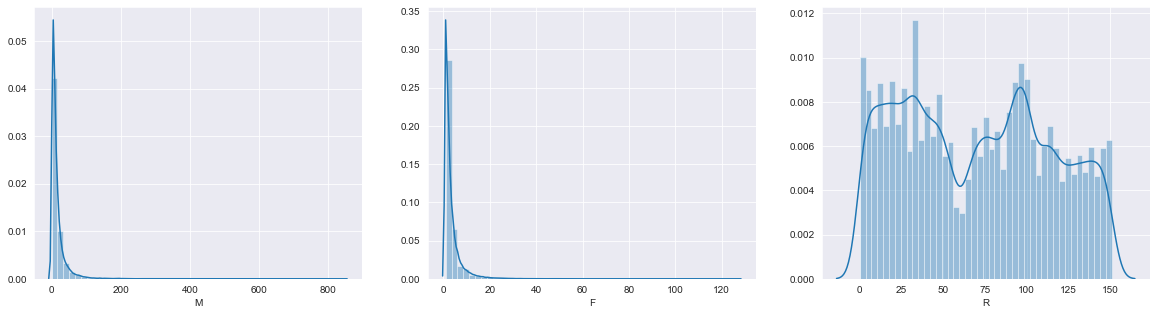

In [4]:
fig,axes=plt.subplots(1,3,figsize=(20,5))

for i, feature in enumerate(list(rfm_ml.columns)):
    
    sns.distplot(rfm_ml[feature],ax=axes[i])
    axes[i].set_ylabel('')

M和F的分布极为集中，而R的分布很分散

In [5]:
rfm_ml.describe()

,M,F,R
count,76202.000000,76202.000000,76202.000000
mean,16.638306,3.376749,70.169562
std,25.342573,4.304186,43.965516
min,0.000000,1.000000,0.000000
25%,4.570000,1.000000,31.000000
50%,9.370000,2.000000,71.000000
75%,18.880000,4.000000,106.000000
max,846.840000,127.000000,151.000000


## RFM得分

三个变量按1-5打分，5-5-5是最好的客户，1-1-1是最差的

（不需要归一化或标准化变量）

In [6]:
rfm_ml=pd.read_csv('rfm_ml.csv')
rfm_ml.index=rfm_ml['user_id']
rfm_ml=rfm_ml.drop('user_id',axis=1)
rfm_ml.head()

,M,F,R
user_id,,,
9794320,5.24,1,96
10280338,20.20,11,16
12055855,5.48,1,71
15400971,6.19,1,78
15781728,0.79,1,105


In [7]:
s1=np.full((1,rfm_ml.shape[0]-int(0.8*rfm_ml.shape[0])),1)
s2=np.full((1,int(0.2*rfm_ml.shape[0])),2)
s3=np.full((1,int(0.2*rfm_ml.shape[0])),3)
s4=np.full((1,int(0.2*rfm_ml.shape[0])),4)
s5=np.full((1,int(0.2*rfm_ml.shape[0])+1),5)
score=np.hstack((s1,s2,s3,s4,s5)).flatten()


rfm_ml=rfm_ml.sort_values(by='R',ascending=False)    # r越大的分值越低

rfm_ml['r_score']=score

for i,j in zip(('F','M'),('f_score','m_score')):
    
    rfm_ml=rfm_ml.sort_values(by=i)
    
    rfm_ml[j]=score
rfm_ml

,M,F,R,r_score,f_score,m_score
user_id,,,,,,
598935509,0.00,1,23,5,2,1
621854037,0.00,1,0,5,2,1
539714006,0.00,1,63,3,1,1
602112760,0.05,1,44,4,1,1
258053316,0.05,1,84,3,1,1
...,...,...,...,...,...,...
550009641,621.34,12,68,3,5,5
612148090,650.64,9,0,5,5,5
486366816,659.48,47,6,5,5,5


可以看出F得分和M得分的相关性很强

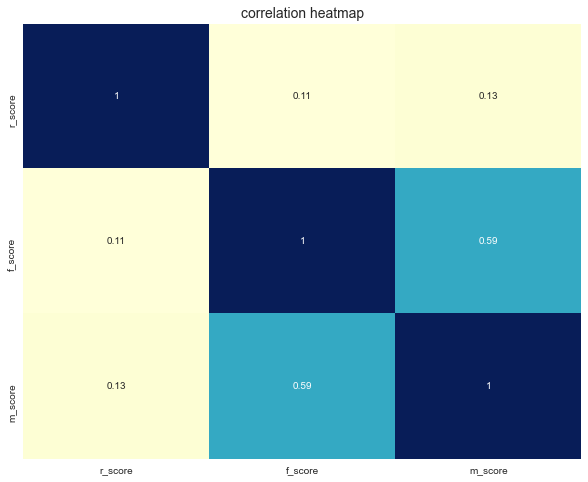

In [8]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(rfm_ml.iloc[:,3:6].corr(),cbar=False,annot=True,cmap="YlGnBu")
plt.title('correlation heatmap',size=14);

## K-Means建模

In [9]:
from sklearn.cluster import KMeans

### 确定最佳k值

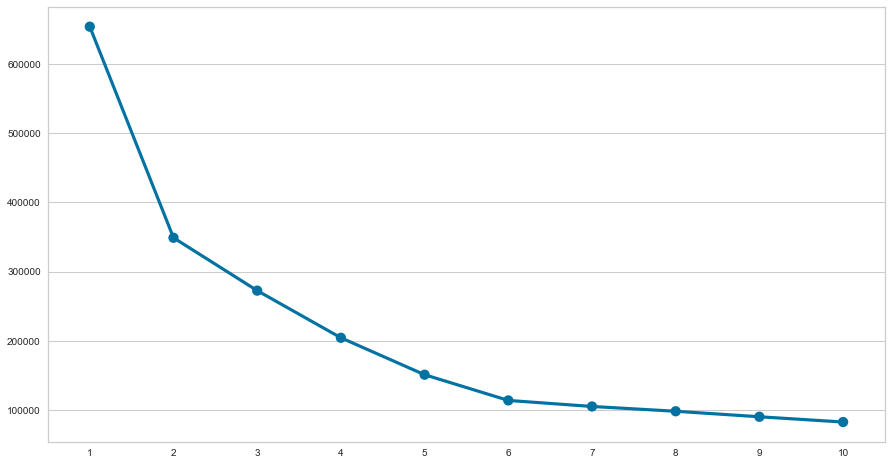

In [15]:
# 确定最佳的k
SSE=[]

plt.figure(figsize=(15,8))
for k in range(0,10):
    
    kmeans=KMeans(n_clusters=k+1,random_state=42).fit(rfm_ml.iloc[:,3:])
    
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x=list(range(1,11)),y=SSE);

可以看出肘点（elbow） 在k=6，6之后SSE下降不明显，不应为了优化SSE而复杂化模型。

### 可视化轮廓系数

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for 𝐾 by comparing multiple visualizers.

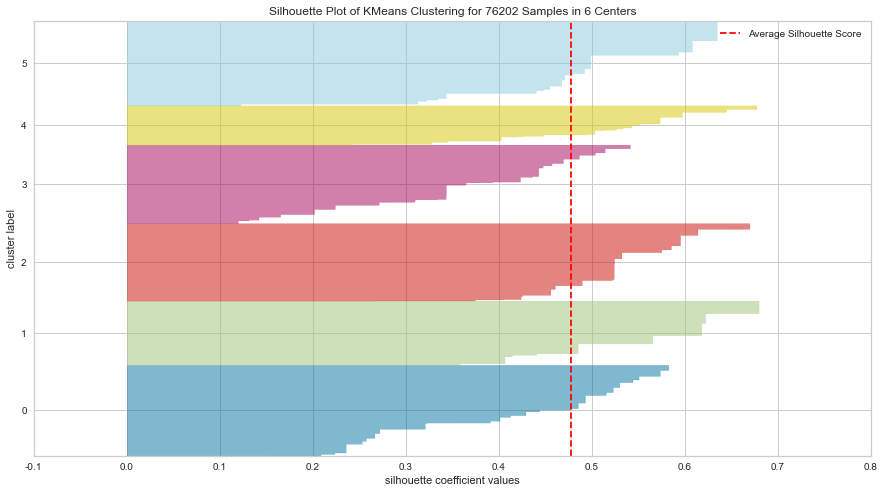

In [16]:
#pip install yellowbrick

plt.figure(figsize=(15,8))
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(6,random_state=42),rfm_ml.iloc[:,3:],colors='yellowbrick');

轮廓系数值相对来说比较高，且刀的宽度更加一致。

### 三维空间可视化

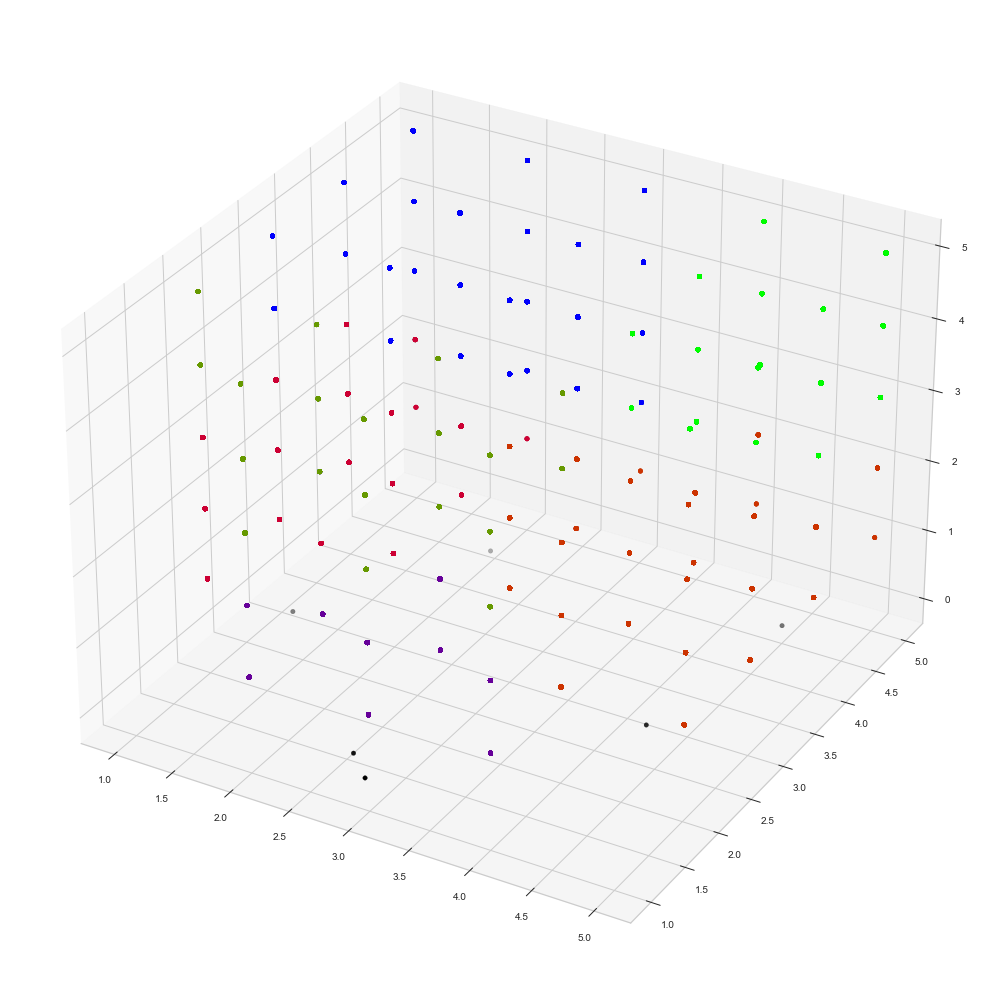

In [19]:
model=KMeans(n_clusters=6,random_state=42).fit(rfm_ml.iloc[:,3:])
centers=model.cluster_centers_
fig=plt.figure(figsize=(25,18))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(rfm_ml.iloc[:,3],rfm_ml.iloc[:,4],rfm_ml.iloc[:,5],cmap='brg',
           c=model.predict(rfm_ml.iloc[:,3:]))

ax.scatter(centers[:,0],centers[:,1],c='black');

可以看出，排列十分整齐，与之前的手动分类结果相近。

## 确定聚类

/Users/wangzizheng/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


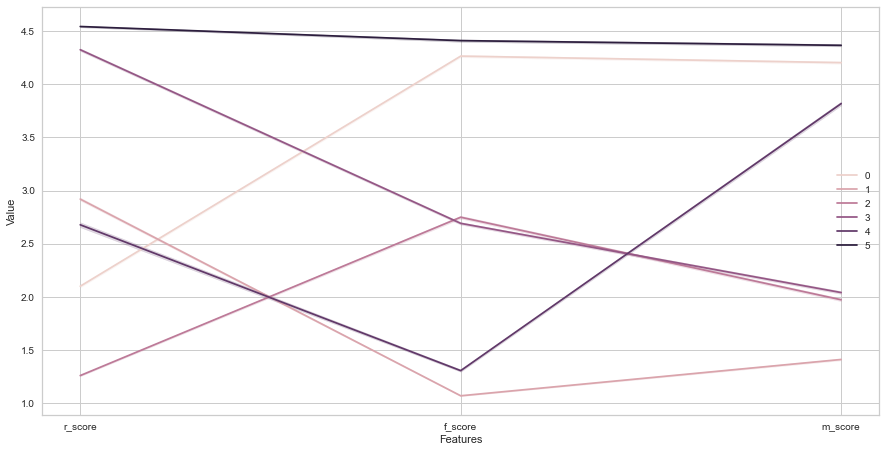

In [20]:
rfm_ml['Cluster']=model.labels_
plt.figure(figsize=(15,7.5))
melted_rfm=pd.melt(rfm_ml.reset_index(),
                   id_vars=['user_id','Cluster'],
                   value_vars=['r_score','f_score','m_score'],
                   var_name='Features',
                   value_name='Value')

sns.lineplot('Features','Value',hue='Cluster',data=melted_rfm)
plt.legend();

In [14]:
rfm_ml.groupby('Cluster').agg(
{
     'R':['mean','min','max'],
     'F':['mean','min','max'],
     'M':['mean','min','max','count']
})

R                  F                   M                \
               mean min  max      mean min  max       mean   min     max   
Cluster                                                                    
0         79.408866  24  151  1.078779   1    2  20.470769  7.06  299.81   
1         23.216063   0   50  7.143118   1  127  35.127981  7.06  846.84   
2         97.093031  50  151  5.209711   2   91  26.027192  3.92  621.34   
3         72.300560  30  114  1.021849   1    2   3.276883  0.00    7.03   
4         29.932432   0   87  1.819311   1   13   5.904316  0.00   22.35   
5        124.099513  87  151  1.816158   1   11   5.481297  0.06   12.07   

                
         count  
Cluster         
0         6880  
1        14792  
2        15941  
3        11259  
4        13764  
5        13566

## 分析与总结

聚类4:

    * 重要价值客户，R,M,F得分都很高
    * 运营策略保持现状就好
    
聚类5:

    * 重要深耕客户，R,M得分高,F得分低
    * 重点提升购买频次
    
聚类1:
    
    * 一般发展用户，R得分高，F,M得分低
    * 运营策略为挖掘需求，个性化推荐商品
    
聚类0:
    
    * 重要保持用户，R得分低，F,M得分高
    * 积极运营，促进用户回流，防止用户流失
    
聚类2:
    
    * 一般挽留用户，R,F,M得分都低
    * 基本可以放弃治疗
    
聚类3：

    * 一般保持用户，与聚类0一致，R得分低，F,M得分相对来说高，但不如聚类0
    * 可促进用户回流，但由于购买频次和金额都不高，营销主动性可以放低

总结：

    模型聚类结果与之前的手动分类类似，但有一些类别不易解释，在实际分析问题的过程中，不应过于相信聚类结果，必要时自行分析。

In [22]:
#rfm_ml.to_csv('rfm_ml.csv')